* 참고 블로그: https://bigwaveai.tistory.com/35

In [1]:
# 패키지 불러오기
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from statsmodels.tsa.seasonal import seasonal_decompose
from neuralprophet import NeuralProphet, set_log_level
import plotly.express as px
import statsmodels.tsa.api as tsa
import plotly.graph_objs as go
import datetime
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

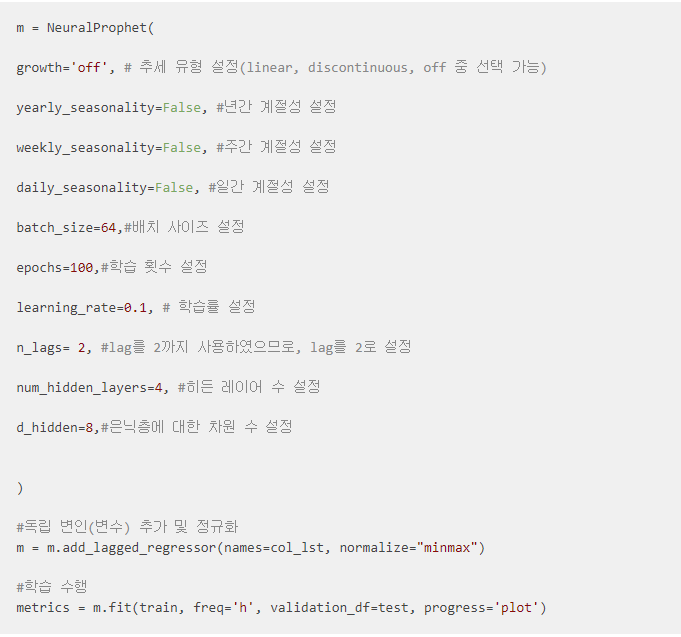

In [2]:
excelFile = 'C:/Users/chunc/Desktop/데이터 샘플/파이널프로젝트 데이터/data_cat_all.xlsx'
df = pd.read_excel(excelFile)

In [3]:
df['period'] = pd.to_datetime(df['period'])

# 데이터 전처리
df = df[['period', '디지털/가전']].rename(columns={'period': 'ds', '디지털/가전': 'y'})

# Neural Prophet 모델 초기화
model = NeuralProphet(
    yearly_seasonality = False,
    weekly_seasonality = False,
    daily_seasonality=True,
    epochs = 80)

# 모델 학습
model.fit(df, freq='D')

# 미래 예측을 위한 데이터프레임 생성
future = model.make_future_dataframe(df, periods=30)  # 30일치의 미래 데이터 예측

# 미래 예측
forecast = model.predict(future)

# 결과 확인
print(forecast.head())

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.873% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (50) is too small than the required number for the learning rate finder (223). The results might not be optimal.


Finding best initial lr:   0%|          | 0/223 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.873% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 50it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


          ds     y      yhat1      trend  season_daily
0 2023-07-04  None  12.341094  21.653383     -9.312289
1 2023-07-05  None  12.312164  21.624454     -9.312289
2 2023-07-06  None  12.283236  21.595524     -9.312289
3 2023-07-07  None  12.254304  21.566593     -9.312289
4 2023-07-08  None  12.225374  21.537663     -9.312289


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.834% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (38) is too small than the required number for the learning rate finder (221). The results might not be optimal.


Finding best initial lr:   0%|          | 0/221 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.457% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.457% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.457% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 38it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


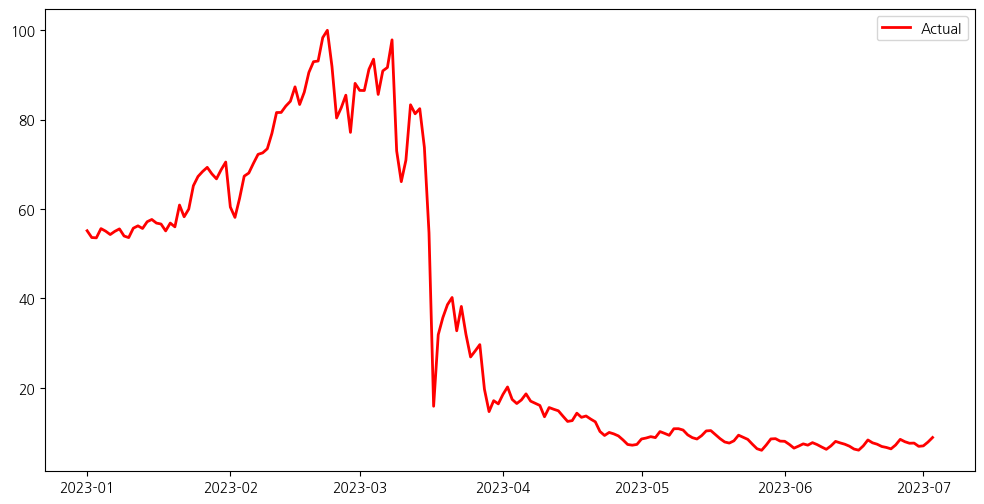

In [4]:
excelFile = 'C:/Users/chunc/Desktop/데이터 샘플/파이널프로젝트 데이터/data_cat_all.xlsx'
df = pd.read_excel(excelFile)

# Convert 'period' column to datetime
df['period'] = pd.to_datetime(df['period'])

# Select 'period' and '디지털/가전' columns
df_selected = df[['period', '디지털/가전']].rename(columns={'period': 'ds', '디지털/가전': 'y'})

# Split data into train and test sets based on 'period' (before and after 2023-01-01)
train_cutoff = pd.to_datetime('2023-01-01')
train_df = df_selected[df_selected['ds'] < train_cutoff]
test_df = df_selected[df_selected['ds'] >= train_cutoff]

# Initialize and train the Neural Prophet model
model = NeuralProphet(
    yearly_seasonality = False,
    weekly_seasonality = False,
    daily_seasonality=True,
    epochs = 80)
model.fit(train_df, freq='D')

# Make predictions on the test set
future = model.make_future_dataframe(test_df, periods=len(test_df))
forecast = model.predict(future)

# Visualize the predictions
fig, ax = plt.subplots(figsize=(12, 6))
model.plot(forecast, xlabel='Date', ylabel='디지털/가전', ax=ax)
ax.plot(test_df['ds'], test_df['y'], label='Actual', color='red', linewidth=2.0)
plt.legend()
plt.show()

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.834% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (38) is too small than the required number for the learning rate finder (221). The results might not be optimal.


Finding best initial lr:   0%|          | 0/221 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.457% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.457% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.457% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 38it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


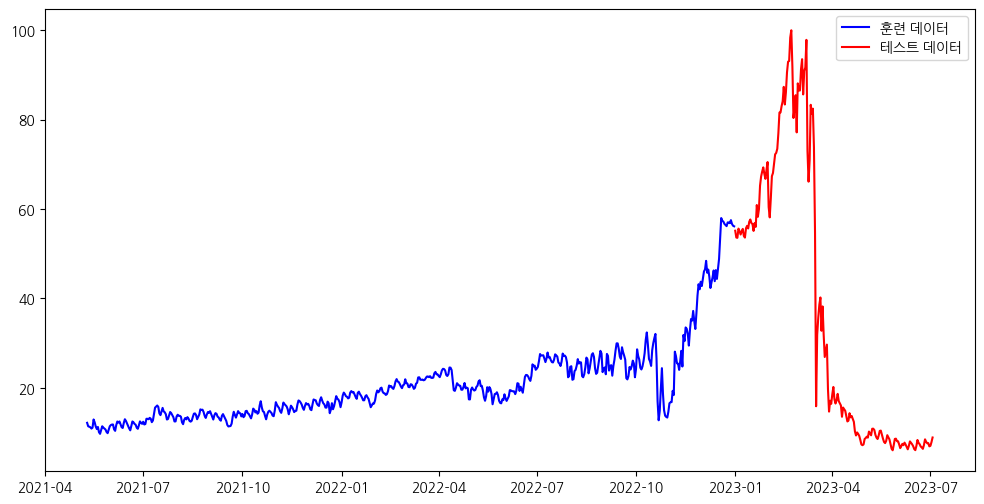

In [5]:
# 데이터 불러오기
excelFile = 'C:/Users/chunc/Desktop/데이터 샘플/파이널프로젝트 데이터/data_cat_all.xlsx'
df = pd.read_excel(excelFile)

# 'period' 컬럼을 날짜 형식으로 변환
df['period'] = pd.to_datetime(df['period'])

# 'period'와 '디지털/가전' 컬럼 선택
df_selected = df[['period', '디지털/가전']].rename(columns={'period': 'ds', '디지털/가전': 'y'})

# 'period' 기준으로 데이터를 훈련셋과 테스트셋으로 분할 (2023년 1월 1일 이전과 이후)
train_cutoff = pd.to_datetime('2023-01-01')
train_df = df_selected[df_selected['ds'] < train_cutoff]
test_df = df_selected[df_selected['ds'] >= train_cutoff]

# Neural Prophet 모델 초기화 및 훈련
model = NeuralProphet(
    yearly_seasonality = False,
    weekly_seasonality = False,
    daily_seasonality=True,
    epochs = 80)
# freq = 'D' -> 일별 주기성
model.fit(train_df, freq='D')

# 테스트셋에 대한 예측값 생성
future = model.make_future_dataframe(test_df, periods=len(test_df))
forecast = model.predict(future)

# 훈련셋과 테스트셋 그리고 예측값 시각화
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(train_df['ds'], train_df['y'], label='훈련 데이터', color='blue')
ax.plot(test_df['ds'], test_df['y'], label='테스트 데이터', color='red')
model.plot(forecast, xlabel='날짜', ylabel='디지털/가전', ax=ax)
plt.legend()
plt.show()

In [6]:
from sklearn.metrics import mean_squared_error

# Get the predicted values from the forecast dataframe
predicted_values = forecast['yhat1'].values

# Get the actual values from the test dataframe
actual_values = test_df['y'].values

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, predicted_values)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("MSE:", mse)
print("RMSE:", rmse)

MSE: 2332.6249772787473
RMSE: 48.29725641564692


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.834% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (38) is too small than the required number for the learning rate finder (221). The results might not be optimal.


Finding best initial lr:   0%|          | 0/221 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.457% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.457% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.457% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 38it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


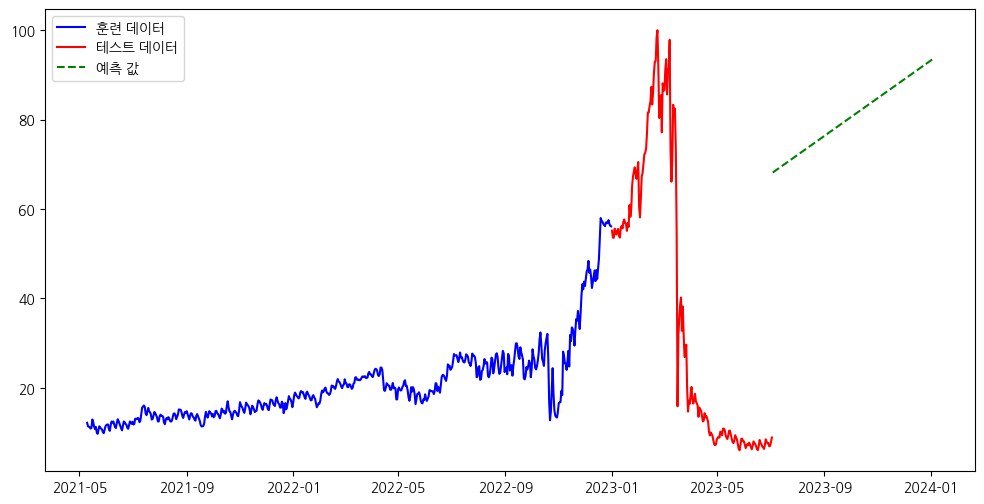

In [7]:
excelFile = 'C:/Users/chunc/Desktop/데이터 샘플/파이널프로젝트 데이터/data_cat_all.xlsx'
df = pd.read_excel(excelFile)

# 'period' 컬럼을 날짜 형식으로 변환
df['period'] = pd.to_datetime(df['period'])

# 'period'와 '디지털/가전' 컬럼 선택
df_selected = df[['period', '디지털/가전']].rename(columns={'period': 'ds', '디지털/가전': 'y'})

# 'period' 기준으로 데이터를 훈련셋과 테스트셋으로 분할 (2023년 1월 1일 이전과 이후)
train_cutoff = pd.to_datetime('2023-01-01')
train_df = df_selected[df_selected['ds'] < train_cutoff]
test_df = df_selected[df_selected['ds'] >= train_cutoff]

# Neural Prophet 모델 초기화 및 훈련
model = NeuralProphet(
    yearly_seasonality = False,
    weekly_seasonality = False,
    daily_seasonality=True,
    epochs = 80)
model.fit(train_df, freq='D')

# 테스트셋에 대한 예측값 생성
future = model.make_future_dataframe(test_df, periods=len(test_df))
forecast = model.predict(future)

# 훈련셋과 테스트셋, 예측값 그리기
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(train_df['ds'], train_df['y'], label='훈련 데이터', color='blue')
ax.plot(test_df['ds'], test_df['y'], label='테스트 데이터', color='red')

# 예측값 그래프에 추가하기
model.plot(forecast, xlabel='날짜', ylabel='디지털/가전', ax=ax)

# 예측값과 실제 원 데이터의 선 그리기
ax.plot(forecast['ds'], forecast['yhat1'], label='예측 값', color='green', linestyle='dashed')

plt.legend()
plt.show()